In [50]:
pip install apyori

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [51]:
from apyori import apriori
import pandas as pd


In [52]:
data = pd.read_csv('Season2.csv')

In [53]:
data

,Date,Product,Customer_Category
0,01/04/2023,"['Yogurt', 'Mustard', 'Banana', 'Coffee','Bisc...",Homemaker
1,01/04/2023,"['Cooking Oil', 'Air Freshener', 'Onions', 'Ap...",Homemaker
2,01/04/2023,"['Milk', 'Tissues']",Middle-Aged
3,01/04/2023,['Dhal'],Young Adult
4,01/04/2023,['Cooking Oil'],Senior Citizen
...,...,...,...
7845,30/06/2023,['Toilet Freshner'],Middle-Aged
7846,30/06/2023,"['Toilet Freshner', 'Insect Repellent']",Young Adult
7847,30/06/2023,"['Shaving Cream', 'Cheese', 'Wheat Rava', 'Hon...",Middle-Aged
7848,30/06/2023,"['Shower Gel', 'Cereal Bars']",Young Adult


In [54]:
data['Product'] = data['Product'].apply(lambda x: [item.strip() for item in x.split(',')])

In [55]:
data['Product']

0       [['Yogurt', 'Mustard', 'Banana', 'Coffee', 'Bi...
1       [['Cooking Oil', 'Air Freshener', 'Onions', 'A...
2                                   [['Milk', 'Tissues']]
3                                              [['Dhal']]
4                                       [['Cooking Oil']]
                              ...                        
7845                                [['Toilet Freshner']]
7846            [['Toilet Freshner', 'Insect Repellent']]
7847    [['Shaving Cream', 'Cheese', 'Wheat Rava', 'Ho...
7848                      [['Shower Gel', 'Cereal Bars']]
7849    [['Baby Wipes', 'Cooking Oil', 'Deodorant', 'M...
Name: Product, Length: 7850, dtype: object

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7850 entries, 0 to 7849
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               7850 non-null   object
 1   Product            7850 non-null   object
 2   Customer_Category  7850 non-null   object
dtypes: object(3)
memory usage: 184.1+ KB


In [57]:
data.shape

(7850, 3)

In [58]:
data.isnull().sum()

Date                 0
Product              0
Customer_Category    0
dtype: int64

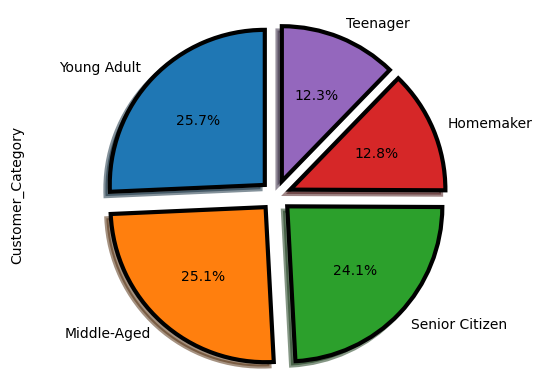

In [59]:
import matplotlib.pyplot as plt
data['Customer_Category'].value_counts().plot(kind='pie', explode=(0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%', shadow=True, startangle=90, wedgeprops={"edgecolor":'black',"linewidth":3,"antialiased": True})
plt.axis('equal')
plt.show()

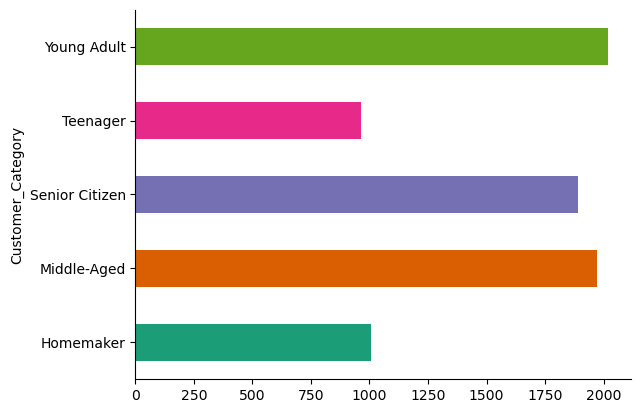

In [60]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Customer_Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

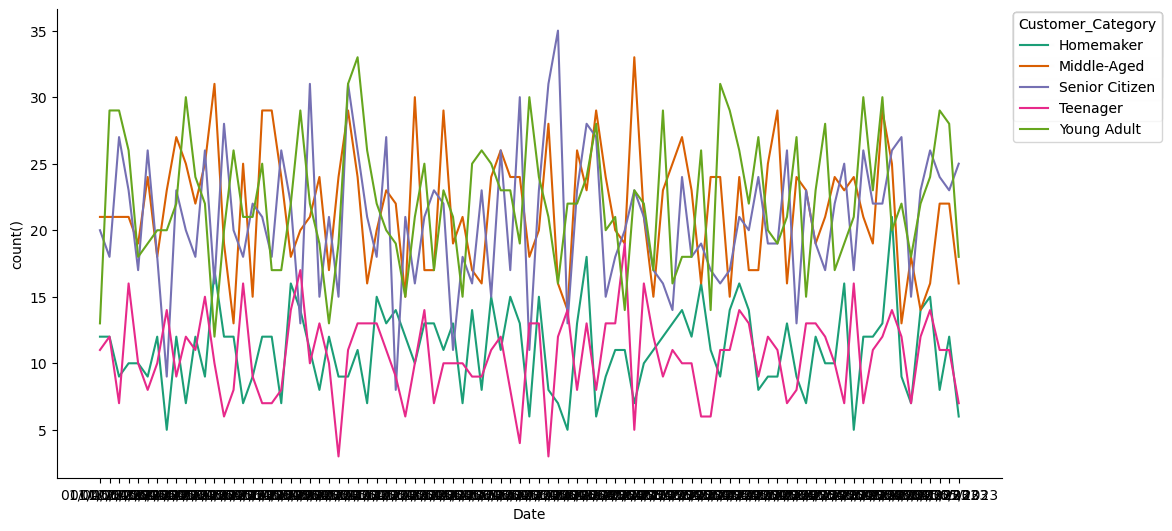

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Customer_Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Customer_Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

In [62]:
transactions = data['Product'].tolist()

In [63]:
transactions

[["['Yogurt'", "'Mustard'", "'Banana'", "'Coffee'", "'Biscuit']"],
 ["['Cooking Oil'", "'Air Freshener'", "'Onions'", "'Apple'", "'Pasta']"],
 ["['Milk'", "'Tissues']"],
 ["['Dhal']"],
 ["['Cooking Oil']"],
 ["['Soda'", "'Baby Wipes'", "'Wheat Flour'", "'Sugar'", "'Potatoes']"],
 ["['Insect Repellent'", "'Yogurt'", "'Olive Oil'", "'Air Freshener']"],
 ["['Milk']"],
 ["['Peanut Butter']"],
 ["['Plant Fertilizer'", "'Banana']"],
 ["['Coffee'", "'Biscuit'", "'Eggs']"],
 ["['Tissues'", "'Vegetables'", "'Bread'", "'Dish Soap']"],
 ["['Power Strips'",
  "'Spices'",
  "'Rice'",
  "'Spices'",
  "'Diapers'",
  "'Dishwash scrubber']"],
 ["['Chips'", "'Milk'", "'Nuts']"],
 ["['Paper Towel For Faces'",
  "'Cereal'",
  "'Ice Cream'",
  "'Tomatoes'",
  "'Jam'",
  "'Bread']"],
 ["['Peanut Butter'", "'Coffee'", "'Biscuit'", "'Deodorant']"],
 ["['Ketchup'", "'Diapers']"],
 ["['Kambu Rice'", "'Hand Sanitizer']"],
 ["['Milk'", "'Potatoes'", "'Banana'", "'Ice Cream']"],
 ["['Saftey Razor Blade']"],
 ["['M

In [76]:
results = list(apriori(transactions, min_support=0.01, min_confidence=0.3))

In [77]:
for rule in results:
    print(rule)

RelationRecord(items=frozenset({"'Coffee'", "'Biscuit'"}), support=0.013630573248407643, ordered_statistics=[OrderedStatistic(items_base=frozenset({"'Coffee'"}), items_add=frozenset({"'Biscuit'"}), confidence=0.6257309941520468, lift=12.725358300760536)])
RelationRecord(items=frozenset({"'Tea'", "'Biscuit'"}), support=0.01592356687898089, ordered_statistics=[OrderedStatistic(items_base=frozenset({"'Biscuit'"}), items_add=frozenset({"'Tea'"}), confidence=0.3238341968911917, lift=13.240096070811743), OrderedStatistic(items_base=frozenset({"'Tea'"}), items_add=frozenset({"'Biscuit'"}), confidence=0.6510416666666666, lift=13.240096070811743)])
RelationRecord(items=frozenset({"['Coffee'", "'Biscuit'"}), support=0.010828025477707006, ordered_statistics=[OrderedStatistic(items_base=frozenset({"['Coffee'"}), items_add=frozenset({"'Biscuit'"}), confidence=0.7727272727272727, lift=15.714790390956194)])
RelationRecord(items=frozenset({"['Tea'", "'Biscuit'"}), support=0.01019108280254777, ordered_

In [78]:
# Assuming you have a dataset called 'transactions' where each transaction is a list of items
# And 'results' is a list of tuples where each tuple contains the rule, support, and confidence

for Product in results:
    pair = Product[0]
    items = [x for x in pair]
    
    if len(items) > 2:
        print("Rule: " + items[0] + " -> " + items[1])
        print("Support: " + str(Product[1]))
        print("Confidence: " + str(Product[2][0][2]))
        
    else:
        print("Rule: " + items[0] + " -> " + items[1])
        print("Support: " + str(Product[1]))
        print("Confidence: " + str(Product[2][0][2]))
    
    # Calculate lift
    item1_count = sum(1 for transaction in transactions if items[0] in transaction)
    item2_count = sum(1 for transaction in transactions if items[1] in transaction)
    rule_count = sum(1 for transaction in transactions if all(item in transaction for item in items))
    
    total_transactions = len(transactions)
    item1_support = item1_count / total_transactions
    item2_support = item2_count / total_transactions
    rule_support = rule_count / total_transactions
    
    lift = rule_support / (item1_support * item2_support)
    print("Lift: " + str(lift))
    print("=====================================")


Rule: 'Coffee' -> 'Biscuit'
Support: 0.013630573248407643
Confidence: 0.6257309941520468
Lift: 12.725358300760538
Rule: 'Tea' -> 'Biscuit'
Support: 0.01592356687898089
Confidence: 0.3238341968911917
Lift: 13.240096070811745
Rule: ['Coffee' -> 'Biscuit'
Support: 0.010828025477707006
Confidence: 0.7727272727272727
Lift: 15.714790390956194
Rule: ['Tea' -> 'Biscuit'
Support: 0.01019108280254777
Confidence: 0.8510638297872339
Lift: 17.307904310439863
Rule: 'Jam' -> 'Bread'
Support: 0.015796178343949044
Confidence: 0.401294498381877
Lift: 15.594860456919477
Rule: 'Bread'] -> 'Jam'
Support: 0.011082802547770701
Confidence: 0.4860335195530726
Lift: 18.88793627966149
Rule: 'Chips' -> 'Juices'
Support: 0.015414012738853504
Confidence: 0.40468227424749165
Lift: 18.257217545073615
Rule: ['Juices' -> 'Chips'
Support: 0.01019108280254777
Confidence: 0.7766990291262136
Lift: 20.391596584082862
Rule: 'Feminine Hygiene Products' -> 'Paper Towel for Faces'
Support: 0.014012738853503185
Confidence: 0.625

In [119]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Sample dataset (list of lists representing transactions)
dataset = [['Nuts', 'Dhal'],
           ['Vegetables', 'Dhal', 'Potatoes', 'Cheese'],
           ['Stationery', 'Bread', 'Broom', 'Coffee','Biscuit', 'Dhal'],
           ['Semiya', 'Spinach', 'Dhal', 'Toothbrush', 'Orange'],
           ['Spinach', 'Dhal', 'Juices','Chips', 'Vinegar','Ice Cream'],
           ['Tissues', 'Pickles', 'Dhal', 'Chocolate','Ice Cream'],
           ['Tea','Biscuit', 'Potatoes', 'Rice','Spices', 'Saftey Razor Blade', 'Dhal'],
           ['Spices', 'Saftey Razor Blade', 'Dhal', 'Saftey Razor Blade', 'Shower Gel'],
           ['Toothbrush', 'Juices','Chips', 'Dhal'],
           ['Power Strips', 'Tomatoes', 'Vegetables', 'Dhal', 'Tea','Biscuit'],
           ['Pickles', 'Semiya', 'Dhal'],
           ['Toothpaste',  'Tongue Cleaner', 'Spices', 'Ragi Malt', 'Coffee','Biscuit', 'Dhal'],
           ['Saftey Razor Blade', 'Toothpaste',  'Tongue Cleaner', 'Dhal', 'Eggs'],
           ['Soda', 'Ragi Malt', 'Nuts', 'Dhal'],
           ['Rice','Spices', 'Dhal', 'Stationery'],
           ['Spices', 'Paper Towel For Faces', 'Hand Sanitizer', 'Dhal', 'Deodorant'],
           ['Ragi Malt', 'Chips', 'Dhal', 'Bread', 'Power Strips'],
           ['Tea','Biscuit', 'Coffee','Biscuit', 'Dhal', 'Milk'],
           ['Tomatoes', 'Dhal', 'Jam','Bread', 'Shaving Cream', 'Juices','Chips'],
           ['Vinegar', 'Dhal', 'Toothbrush', 'Diapers'],
           ['Power Strips', 'Tomatoes', 'Honey', 'Dhal'],
           ['Spices', 'Hand Sanitizer', 'Dhal', 'Hand Sanitizer', 'Saftey Razor Blade'],
           ['Tea','Biscuit', 'Dhal', 'Chips', 'Shampoo', 'Apple'],
           ['Stationery', 'Dhal', 'Cooking Oil', 'Body wash', 'Sugar'],
           ['Wheat Flour', 'Dish Soap', 'Shampoo', 'Dhal'],
           ['Mop', 'Toilet Freshner', 'Dhal', 'Vegetables'],
           ['Plant Fertilizer', 'Dhal'],
           ['Power Strips', 'Sugar', 'Dhal', 'Shower Gel'],
           ['Soda', 'Air Freshener', 'Laundry Detergent', 'Stationery', 'Dhal'],
           ['Mustard', 'Insect Repellent', 'Dhal', 'Trash Bags', 'Chips'],
           ['Mustard', 'Cooking Oil', 'Tomatoes', 'Coffee','Biscuit', 'Dhal'],
           ['Mustard', 'Dhal', 'Dishwash scrubber'],
           ['Soap', 'Dhal', 'Olive Oil', 'Tomatoes', 'Honey'],
           ['Vinegar', 'Dhal'],
           ['Spinach', 'Deodorant', 'Ice Cream', 'Dhal', 'Air Freshener'],
           ['Vinegar', 'Ketchup', 'Dhal', 'Plant Fertilizer', 'Banana'],
           ['Tea','Biscuit', 'Dhal', 'Sugar', 'Coffee','Biscuit', 'Broom'],
           ['Salt', 'Ragi Malt', 'Toilet Freshner', 'Baby Wipes', 'Dhal'],
           ['Tomatoes', 'Dhal', 'Cooking Oil', 'Soap', 'Air Freshener'],
           ['Semiya', 'Dhal'],
           ['Orange', 'Paper Towel For Faces', 'Shaving Cream', 'Dhal', 'Olive Oil'],
           ['Pasta', 'Vegetables', 'Ketchup', 'Dhal'],
           ['Milk', 'Dhal', 'Cheese', 'Feminine Hygiene Products','Paper Towel for Faces'],
           ['Shampoo', 'Dhal'],
           ['Shaving Cream', 'Plant Fertilizer', 'Dhal'],
           ['Toilet Freshner', 'Spinach', 'Honey', 'Dhal'],
           ['Shower Gel', 'Power Strips', 'Laundry Detergent', 'Dhal'],
           ['Wheat Rava', 'Ragi Malt', 'Dhal', 'Shaving Cream'],
           ['Spices', 'Dhal'],
           ['Peanut Butter', 'Pasta', 'Vinegar', 'Soap', 'Dhal'],
           ['Shower Gel', 'Dhal', 'Bread', 'Dustpan', 'Cleaning Spray'],
           ['Light Bulbs', 'Stationery', 'Milk', 'Vinegar', 'Dhal'],
           ['Paper Towel For Faces', 'Soda', 'Juices','Chips', 'Dhal', 'Soap'],
           ['Toothbrush', 'Toothpaste',  'Tongue Cleaner', 'Dhal'],
           ['Wheat Flour', 'Dhal', 'Ice Cream', 'Black pepper'],
           ['Soda', 'Dhal', 'Pasta', 'Body wash', 'Peanut Butter'],
           ['Stationery', 'Dhal', 'Eggs', 'Tomatoes'],
           ['Toothpaste',  'Tongue Cleaner', 'Tissues', 'Dhal', 'Power Strips'],
           ['Shaving Cream', 'Dhal', 'Chocolate'],
           ['Sugar', 'Diapers', 'Dhal', 'Soda'],
           ['Vegetables', 'Dhal', 'Dishwash scrubber', 'Wheat Rava'],
           ['Nuts', 'Deodorant', 'Carrots', 'Dhal'],
           ['Light Bulbs', 'Semiya', 'Dhal'],
           ['Vinegar', 'Apple', 'Trash Bags', 'Dhal'],
           ['Mustard', 'Dhal', 'Shampoo'],
           ['Plant Fertilizer', 'Air Freshener', 'Dhal'],
           ['Ragi Malt', 'Dhal', 'Baby Wipes', 'Sugar', 'Jam','Bread'],
           ['Toothpaste',  'Tongue Cleaner', 'Dhal', 'Plant Fertilizer', 'Spinach'],
           ['Toothpaste',  'Tongue Cleaner', 'Mustard', 'Dhal', 'Potatoes', 'Chocolate'],
           ['Potatoes', 'Dhal', 'Chocolate', 'Broom'],
           ['Tomatoes', 'Dhal', 'Shaving Cream'],
           ['Peanut Butter', 'Tea','Biscuit', 'Dhal', 'Yogurt'],
           ['Milk', 'Saftey Razor Blade', 'Vinegar', 'Dhal', 'Spices'],
           ['Mop', 'Dishwash scrubber', 'Dhal', 'Light Bulbs'],
           ['Mop', 'Dhal'],
           ['Onions', 'Soap', 'Potatoes', 'Dhal', 'Dish Soap'],
           ['Potatoes', 'Black pepper', 'Dhal'],
           ['Milk', 'Dhal', 'Laundry Detergent', 'Ragi Malt', 'Banana'],
           ['Ragi Malt', 'Carrots', 'Dhal'],
           ['Toothbrush', 'Rice','Spices', 'Soda', 'Dhal'],
           ['Yogurt', 'Spinach', 'Sugar', 'Dhal', 'Soda'],
           ['Stationery', 'Dhal', 'Bread', 'Paper Towel For Faces'],
           ['Tissues', 'Eggs', 'Paper Towel For Faces', 'Vinegar', 'Dhal'],
           ['Milk', 'Power Strips', 'Dhal', 'Pickles'],
           ['Milk', 'Toothbrush', 'Dish Soap', 'Cereal', 'Dhal'],
           ['Shampoo', 'Saftey Razor Blade', 'Dhal'],
           ['Milk', 'Dhal', 'Carrots', 'Dishwash scrubber'],
           ['Spinach', 'Toilet Freshner', 'Yogurt', 'Apple', 'Dhal'],
           ['Tissues', 'Toothbrush', 'Pasta', 'Dhal'],
           ['Peanut Butter', 'Hair Gel', 'Dhal'],
           ['Nuts', 'Baby Wipes', 'Spices', 'Hair Gel', 'Dhal'],
           ['Spinach', 'Chips', 'Carrots', 'Ragi Malt', 'Dhal'],
           ['Toothpaste',  'Tongue Cleaner', 'Toothpaste', 'Dhal', 'Milk', 'Pickles'],
           ['Onions', 'Peanut Butter', 'Dhal', 'Broom'],
           ['Wheat Rava', 'Cleaner', 'Toilet Freshner', 'Dishwash scrubber', 'Dhal'],
           ['Toilet Freshner', 'Toothbrush', 'Dhal', 'Ice Cream', 'Eggs'],
           ['Mop', 'Stationery', 'Deodorant', 'Dhal'],
           ['Trash Bags', 'Dhal', 'Mop', 'Dish Soap'],
           ['Ragi Malt', 'Deodorant', 'Dhal'],
           ['Vinegar', 'Dhal', 'Banana', 'Semiya'],
           ['Vinegar', 'Sugar', 'Dhal', 'Olive Oil', 'Milk']]

# Initialize TransactionEncoder
encoder = TransactionEncoder()

# Transform dataset into a boolean DataFrame
df = pd.DataFrame(encoder.fit_transform(dataset), columns=encoder.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Extract association rules based on desired support, confidence, and lift thresholds
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Print association rules along with their antecedents, consequents, support, confidence, and lift
for index, rule in rules.iterrows():
    antecedent = set(rule['antecedents'])
    consequent = set(rule['consequents'])
    print("Rule:", antecedent, "->", consequent)
    print("Support:", rule['support'])
    print("Confidence:", rule['confidence'])
    print("Lift:", rule['lift'])
    print("=====================================")


Rule: {'Air Freshener'} -> {'Dhal'}
Support: 0.039603960396039604
Confidence: 1.0
Lift: 1.0
Rule: {'Apple'} -> {'Dhal'}
Support: 0.0297029702970297
Confidence: 1.0
Lift: 1.0
Rule: {'Baby Wipes'} -> {'Dhal'}
Support: 0.0297029702970297
Confidence: 1.0
Lift: 1.0
Rule: {'Baby Wipes'} -> {'Ragi Malt'}
Support: 0.019801980198019802
Confidence: 0.6666666666666667
Lift: 6.733333333333333
Rule: {'Banana'} -> {'Dhal'}
Support: 0.0297029702970297
Confidence: 1.0
Lift: 1.0
Rule: {'Banana'} -> {'Vinegar'}
Support: 0.019801980198019802
Confidence: 0.6666666666666667
Lift: 6.121212121212122
Rule: {'Broom'} -> {'Biscuit'}
Support: 0.019801980198019802
Confidence: 0.5
Lift: 5.611111111111112
Rule: {'Coffee'} -> {'Biscuit'}
Support: 0.04950495049504951
Confidence: 1.0
Lift: 11.222222222222223
Rule: {'Biscuit'} -> {'Coffee'}
Support: 0.04950495049504951
Confidence: 0.5555555555555556
Lift: 11.222222222222221
Rule: {'Biscuit'} -> {'Dhal'}
Support: 0.0891089108910891
Confidence: 1.0
Lift: 1.0
Rule: {'Tea'